In [ ]:
import pandas as pd
import math

def calculate_entropy(comments):
    """Calculates the entropy of a list of comments."""
    word_counts = {}
    total_words = 0
    for comment in comments:
        if isinstance(comment, str):  # Check if the comment is a string
            words = comment.lower().split()
            for word in words:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1
                total_words += 1
    entropy = 0
    for word, count in word_counts.items():
        probability = count / total_words
        entropy -= probability * math.log2(probability)
    return entropy

def process_xlsx(file_path, column_name):
    try:
        # Read the XLSX file into a pandas DataFrame
        xls = pd.ExcelFile(file_path)
        df = pd.read_excel(xls, engine='openpyxl', comment=None) # Read with openpyxl engine
        # Extract comments from the specified column
        comments = df[column_name].dropna().tolist() # Drop rows with NaN values
        entropy = calculate_entropy(comments)
        return comments, entropy
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None, None
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

# Example usage
file_path = 'tt1a.xlsx'  # Replace with the actual file path
column_name = 'Comment'  # Replace with the actual column name
comments, entropy = process_xlsx(file_path, column_name)

if comments:
#    print("Extracted Comments:")
#    for comment in comments:
#        print(comment)
    print(f"\nEntropy of the comments: {entropy}")



Entropy of the comments: 8.692529721871336


In [ ]:
file_path = 'tt1.xlsx'  # Replace with the actual file path
column_name = 'Comment'  # Replace with the actual column name
comments, entropy = process_xlsx(file_path, column_name)

if comments:
    print(f"\nEntropy of the comments: {entropy}")


Entropy of the comments: 8.468697764892314


In [ ]:
file_path = 'tt1c.xlsx'  # Replace with the actual file path
column_name = 'Comment'  # Replace with the actual column name
comments, entropy = process_xlsx(file_path, column_name)

if comments:
    print(f"\nEntropy of the comments: {entropy}")


Entropy of the comments: 8.013279243641104


In [ ]:
file_path = 'tt1g.xlsx'  # Replace with the actual file path
column_name = 'Comment'  # Replace with the actual column name
comments, entropy = process_xlsx(file_path, column_name)

if comments:
    print(f"\nEntropy of the comments: {entropy}")


Entropy of the comments: 7.249403041914079


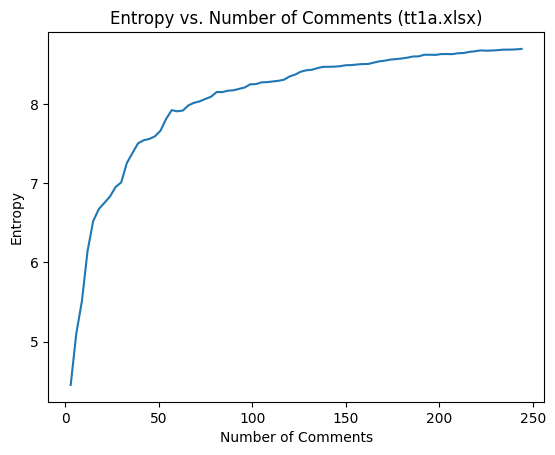

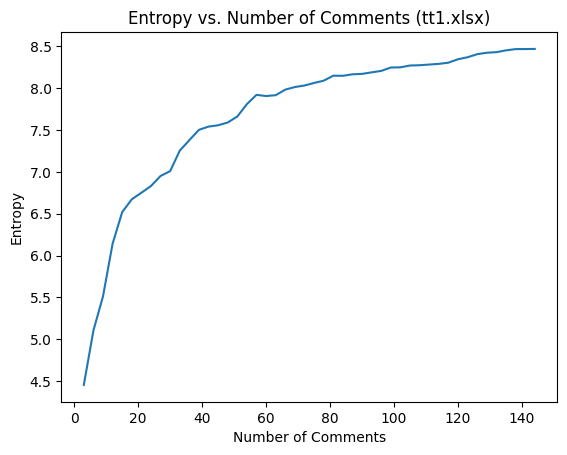

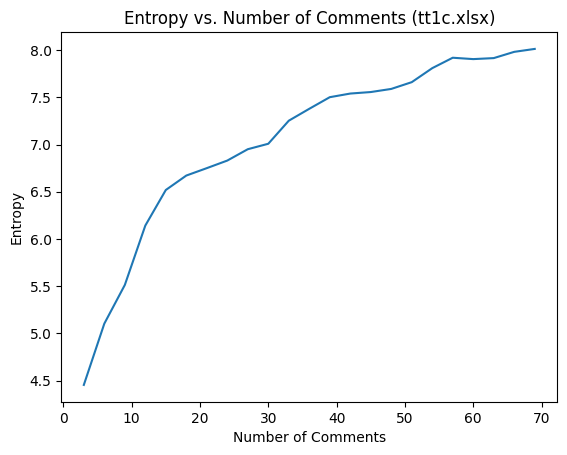

In [ ]:
# prompt: now make fucntion which will make a graph of entropy vs quantity of comments: calculate entropy for each +3 comments

import matplotlib.pyplot as plt

def entropy_vs_comment_quantity(file_path, column_name):
    """
    Calculates entropy for every +3 comments and plots entropy vs. quantity.
    """
    try:
        xls = pd.ExcelFile(file_path)
        df = pd.read_excel(xls, engine='openpyxl')
        comments = df[column_name].dropna().tolist()

        entropies = []
        comment_quantities = []

        for i in range(0, len(comments), 3):
            current_comments = comments[:i+3]
            entropy = calculate_entropy(current_comments)
            entropies.append(entropy)
            comment_quantities.append(len(current_comments))

        plt.plot(comment_quantities, entropies)
        plt.xlabel("Number of Comments")
        plt.ylabel("Entropy")
        plt.title(f"Entropy vs. Number of Comments ({file_path})")
        plt.show()
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage
file_path = 'tt1a.xlsx'  # Replace with your file path
column_name = 'Comment'  # Replace with your column name
entropy_vs_comment_quantity(file_path, column_name)

file_path = 'tt1.xlsx'  # Replace with your file path
column_name = 'Comment'  # Replace with your column name
entropy_vs_comment_quantity(file_path, column_name)

file_path = 'tt1c.xlsx'  # Replace with your file path
column_name = 'Comment'  # Replace with your column name
entropy_vs_comment_quantity(file_path, column_name)


In [ ]:
# prompt: i have xlsx file with comments. export them and calculate entropy for 2-grams of comments. take data from column 'Comment'

import pandas as pd
from collections import Counter
import math

def calculate_ngram_entropy(text, n):
    ngrams = [text[i:i+n] for i in range(len(text)-n+1)]
    counts = Counter(ngrams)
    total_ngrams = len(ngrams)
    entropy = 0
    for ngram, count in counts.items():
        probability = count / total_ngrams
        entropy -= probability * math.log2(probability)
    return entropy

def process_xlsx_ngram(file_path, column_name, n=2):
    try:
        df = pd.read_excel(file_path, engine='openpyxl', comment=None)
        comments = df[column_name].dropna().astype(str).tolist()
        all_comments_text = ''.join(comments).lower() # Combine all comments into one long string
        entropy = calculate_ngram_entropy(all_comments_text, n)
        return entropy
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


# Example usage for 2-grams
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1g.xlsx']
column_name = 'Comment'
for file_path in file_paths:
    entropy = process_xlsx_ngram(file_path, column_name)
    if entropy is not None:
        print(f"Entropy of 2-grams in {file_path}: {entropy}")


Entropy of 2-grams in tt1a.xlsx: 7.880599808040586
Entropy of 2-grams in tt1.xlsx: 7.936475232782331
Entropy of 2-grams in tt1g.xlsx: 7.410682046708928


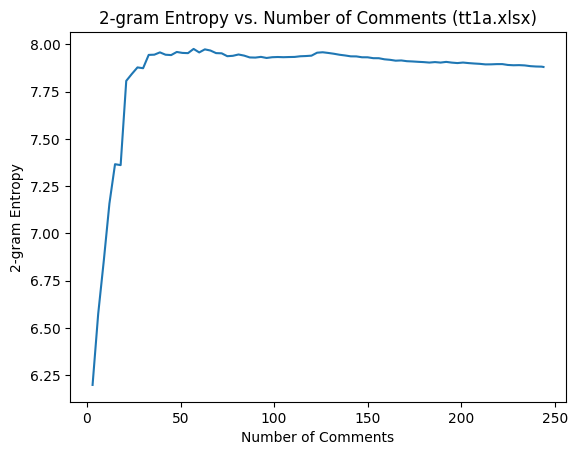

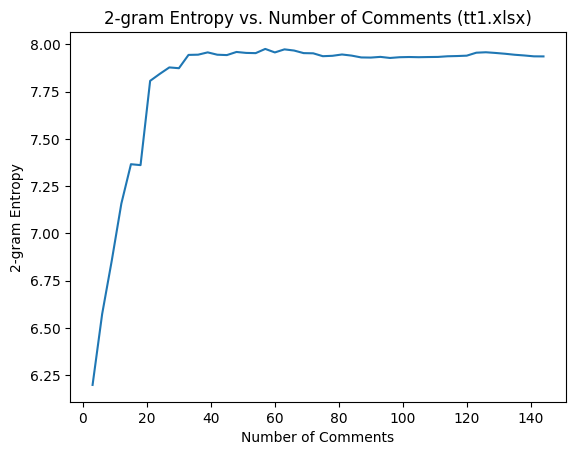

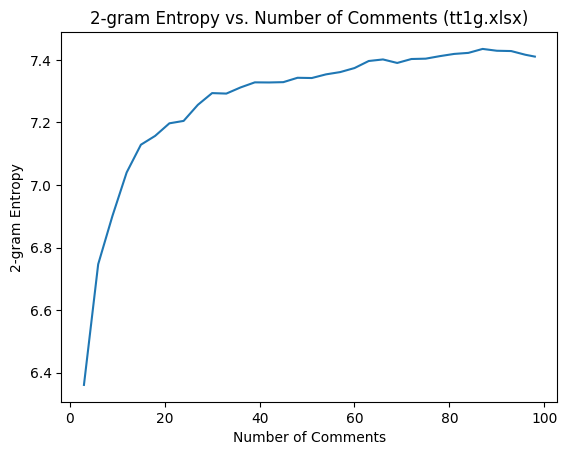

In [ ]:

def entropy_vs_comment_quantity_ngram(file_path, column_name, n=2):
    """
    Calculates 2-gram entropy for every +3 comments and plots entropy vs. quantity.
    """
    try:
        xls = pd.ExcelFile(file_path)
        df = pd.read_excel(xls, engine='openpyxl')
        comments = df[column_name].dropna().astype(str).tolist()

        entropies = []
        comment_quantities = []

        for i in range(0, len(comments), 3):
            current_comments = comments[:i+3]
            all_comments_text = ''.join(current_comments).lower()
            entropy = calculate_ngram_entropy(all_comments_text, n)
            entropies.append(entropy)
            comment_quantities.append(len(current_comments))

        plt.plot(comment_quantities, entropies)
        plt.xlabel("Number of Comments")
        plt.ylabel("2-gram Entropy")
        plt.title(f"2-gram Entropy vs. Number of Comments ({file_path})")
        plt.show()
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage for 2-grams
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1g.xlsx']
column_name = 'Comment'
for file_path in file_paths:
    entropy_vs_comment_quantity_ngram(file_path, column_name)


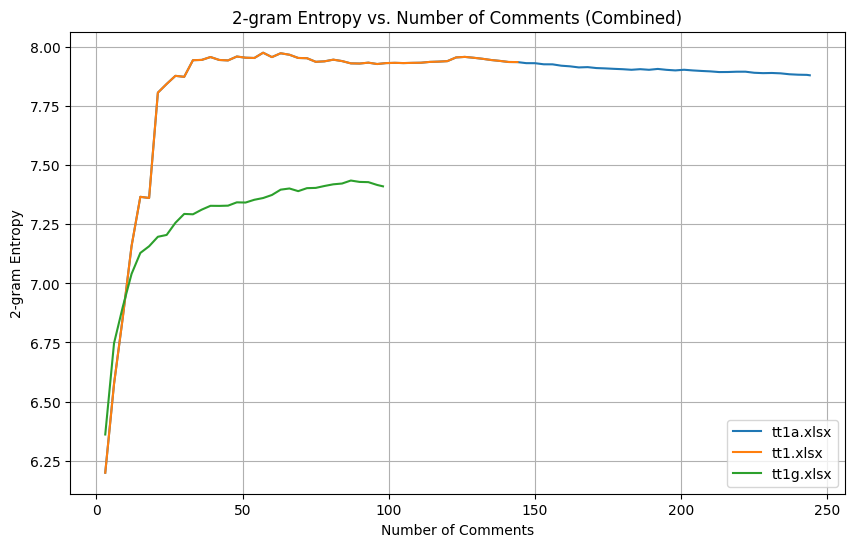

In [ ]:
# prompt: now make fucntion which will make a graph of entropy of 2-grams vs quantity of comments: calculate entropy for each +3 comments. make all graphs on one plot

import matplotlib.pyplot as plt

def entropy_vs_comment_quantity_ngram_combined(file_paths, column_name, n=2):
    """
    Calculates 2-gram entropy for every +3 comments and plots entropy vs. quantity for multiple files on one plot.
    """
    plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

    for file_path in file_paths:
        try:
            xls = pd.ExcelFile(file_path)
            df = pd.read_excel(xls, engine='openpyxl')
            comments = df[column_name].dropna().astype(str).tolist()

            entropies = []
            comment_quantities = []

            for i in range(0, len(comments), 3):
                current_comments = comments[:i + 3]
                all_comments_text = ''.join(current_comments).lower()
                entropy = calculate_ngram_entropy(all_comments_text, n)
                entropies.append(entropy)
                comment_quantities.append(len(current_comments))

            plt.plot(comment_quantities, entropies, label=file_path)  # Add label for each file

        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
        except KeyError:
            print(f"Error: Column '{column_name}' not found in the file.")
        except Exception as e:
            print(f"An error occurred: {e}")

    plt.xlabel("Number of Comments")
    plt.ylabel("2-gram Entropy")
    plt.title("2-gram Entropy vs. Number of Comments (Combined)")
    plt.legend()  # Show the legend to differentiate lines
    plt.grid(True) # Add a grid for better readability
    plt.show()


# Example usage for 2-grams with combined plot
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1g.xlsx'] # Example file paths, replace with your actual paths
column_name = 'Comment'
entropy_vs_comment_quantity_ngram_combined(file_paths, column_name)


In [ ]:
# prompt: write a fucntion that calculates entropies of words for each 50 comments

def calculate_entropy_per_50(comments):
    """Calculates entropy for every 50 comments."""
    entropies = []
    for i in range(0, len(comments), 50):
        current_comments = comments[i:i + 50]
        if current_comments:  # Check if the chunk is not empty
            entropy = calculate_entropy(current_comments)
            entropies.append(entropy)
    return entropies

# Example usage (assuming 'comments' is already defined from a previous function call)
file_path = 'tt1a.xlsx'
column_name = 'Comment'
comments, _ = process_xlsx(file_path, column_name)

if comments:
    entropies = calculate_entropy_per_50(comments)
    print(entropies)


[7.661914513826318, 7.754341194423508, 7.603584182420725, 7.107512711239573, 6.88095890299272]


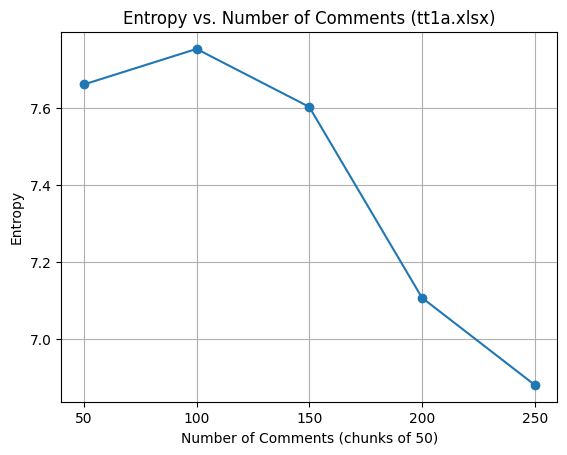

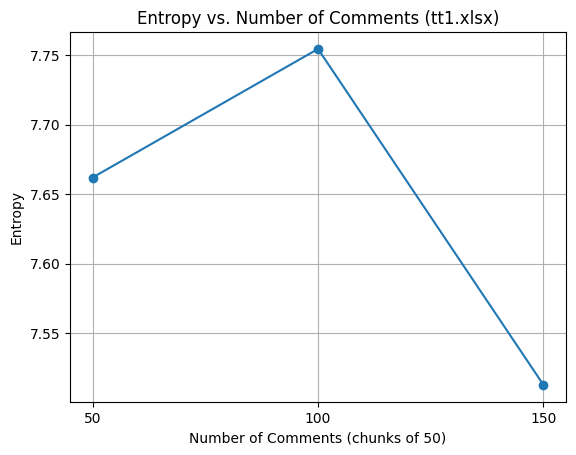

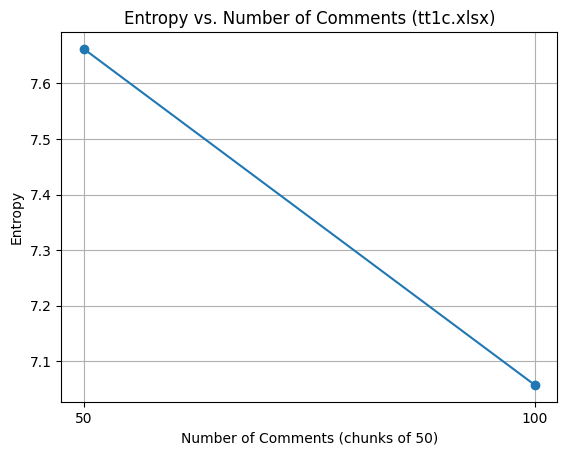

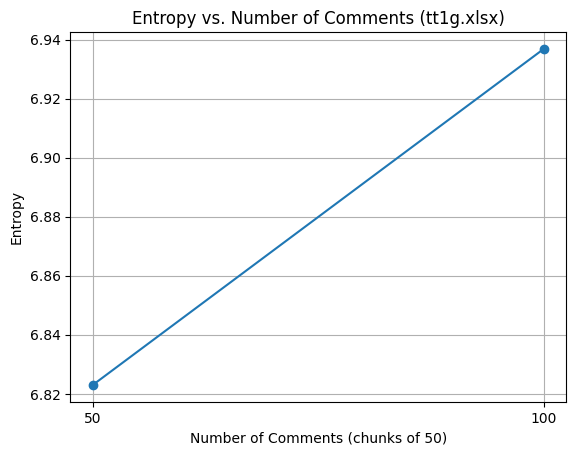

In [ ]:
# prompt: draw a graph entropy vs chunks (chunk1, chunk2, chunk3 ... )

import matplotlib.pyplot as plt

def entropy_vs_comment_quantity_per_50(file_path, column_name):
    """
    Calculates entropy for every 50 comments and plots entropy vs. quantity.
    """
    try:
        xls = pd.ExcelFile(file_path)
        df = pd.read_excel(xls, engine='openpyxl')
        comments = df[column_name].dropna().tolist()

        entropies = []
        comment_quantities = []

        for i in range(0, len(comments), 50):
            current_comments = comments[i:i + 50]
            if current_comments:
                entropy = calculate_entropy(current_comments)
                entropies.append(entropy)
                comment_quantities.append(i + 50)  # Use the end index of the chunk

        plt.plot(comment_quantities, entropies, marker='o') # Added markers
        plt.xlabel("Number of Comments (chunks of 50)")
        plt.ylabel("Entropy")
        plt.title(f"Entropy vs. Number of Comments ({file_path})")
        plt.xticks(comment_quantities) # Ensure all chunk sizes are shown on x-axis
        plt.grid(True) #Added grid
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1c.xlsx', 'tt1g.xlsx']
column_name = 'Comment'
for file_path in file_paths:
    entropy_vs_comment_quantity_per_50(file_path, column_name)


In [ ]:
# prompt: now, write a fucntion that calculates entropies for 2-grams for each 50 comments

import pandas as pd
import math
from collections import Counter

def calculate_ngram_entropy(text, n):
    ngrams = [text[i:i+n] for i in range(len(text)-n+1)]
    counts = Counter(ngrams)
    total_ngrams = len(ngrams)
    entropy = 0
    for ngram, count in counts.items():
        probability = count / total_ngrams
        entropy -= probability * math.log2(probability)
    return entropy

def process_xlsx_ngram_by_chunk(file_path, column_name, chunk_size=50, n=2):
    """
    Calculates entropy for n-grams in chunks of comments from an Excel file.
    """
    try:
        df = pd.read_excel(file_path, engine='openpyxl', comment=None)
        comments = df[column_name].dropna().astype(str).tolist()

        entropies = []
        for i in range(0, len(comments), chunk_size):
            chunk = comments[i:i + chunk_size]
            all_comments_text = ''.join(chunk).lower()
            entropy = calculate_ngram_entropy(all_comments_text, n)
            entropies.append(entropy)
        return entropies
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage for 2-grams with chunks of 50 comments
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1c.xlsx']
column_name = 'Comment'
for file_path in file_paths:
    entropies = process_xlsx_ngram_by_chunk(file_path, column_name)
    if entropies is not None:
        print(f"Entropies of 2-grams in {file_path} (chunks of 50 comments):")
        for i, entropy in enumerate(entropies):
            print(f"Chunk {i+1}: {entropy}")


Entropies of 2-grams in tt1a.xlsx (chunks of 50 comments):
Chunk 1: 7.970491984685576
Chunk 2: 7.672946833592205
Chunk 3: 7.64239586291957
Chunk 4: 7.428233837420065
Chunk 5: 7.374625745606643
Entropies of 2-grams in tt1.xlsx (chunks of 50 comments):
Chunk 1: 7.970491984685576
Chunk 2: 7.672946833592205
Chunk 3: 7.619515968928735
Entropies of 2-grams in tt1c.xlsx (chunks of 50 comments):
Chunk 1: 7.970491984685576
Chunk 2: 7.524956699668762


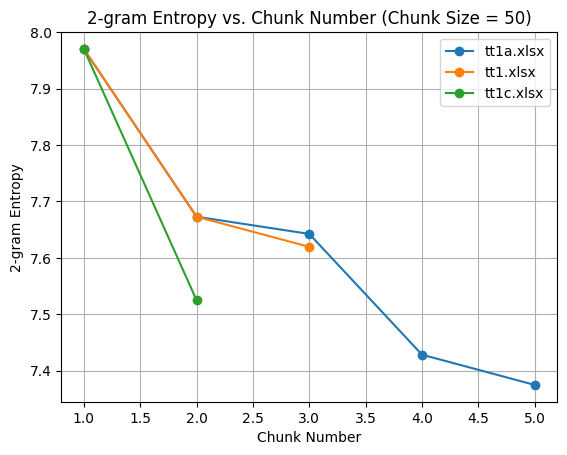

In [ ]:
# prompt: draw a graph entropy of 2grams vs chunks (chunk1, chunk2, chunk3 ... )

import matplotlib.pyplot as plt

def plot_entropy_vs_chunks(file_paths, column_name, chunk_size=50, n=2):
    """Plots entropy of n-grams vs. chunks for multiple files."""
    for file_path in file_paths:
        entropies = process_xlsx_ngram_by_chunk(file_path, column_name, chunk_size, n)
        if entropies is not None:
            chunk_numbers = range(1, len(entropies) + 1)
            plt.plot(chunk_numbers, entropies, marker='o', label=file_path)

    plt.xlabel("Chunk Number")
    plt.ylabel(f"{n}-gram Entropy")
    plt.title(f"{n}-gram Entropy vs. Chunk Number (Chunk Size = {chunk_size})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1c.xlsx']
column_name = 'Comment'
plot_entropy_vs_chunks(file_paths, column_name)


In [ ]:
# prompt: write a fucntion that calculates entropies of words for each x comments. write example of use

def calculate_entropies_by_chunk(file_path, column_name, chunk_size=50):
    """
    Calculates word entropies for each chunk of comments in an Excel file.

    Args:
        file_path (str): Path to the Excel file.
        column_name (str): Name of the column containing comments.
        chunk_size (int): Number of comments per chunk.

    Returns:
        list: A list of entropies, one for each chunk.
    """

    try:
        df = pd.read_excel(file_path, engine='openpyxl')
        comments = df[column_name].dropna().tolist()
        entropies = []

        for i in range(0, len(comments), chunk_size):
            chunk = comments[i : i + chunk_size]
            entropy = calculate_entropy(chunk)
            entropies.append(entropy)

        return entropies

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None

    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
file_path = 'tt1a.xlsx'  # Replace with the actual file path
column_name = 'Comment'  # Replace with the actual column name
chunk_size = 10  # Calculate entropy for every 10 comments

entropies = calculate_entropies_by_chunk(file_path, column_name, chunk_size)

if entropies:
  print(f"Entropies for chunks of {chunk_size} comments in '{file_path}':")
  for i, entropy in enumerate(entropies):
      print(f"Chunk {i + 1}: {entropy}")


In [ ]:
# prompt: write a fucntion that calculates entropies of words for each x comments (chunks with size n). you should ignore last chunk if it is not full. write example of use

import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import Counter

def calculate_entropy(comments):
    """Calculates the entropy of a list of comments."""
    word_counts = {}
    total_words = 0
    for comment in comments:
        if isinstance(comment, str):  # Check if the comment is a string
            words = comment.lower().split()
            for word in words:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1
                total_words += 1
    entropy = 0
    for word, count in word_counts.items():
        probability = count / total_words
        entropy -= probability * math.log2(probability)
    return entropy

def calculate_entropies_by_chunk(file_path, column_name, chunk_size=50):
    """
    Calculates word entropies for each chunk of comments in an Excel file.

    Args:
        file_path (str): Path to the Excel file.
        column_name (str): Name of the column containing comments.
        chunk_size (int): Number of comments per chunk.

    Returns:
        list: A list of entropies, one for each chunk.
    """
    try:
        df = pd.read_excel(file_path, engine='openpyxl')
        comments = df[column_name].dropna().tolist()
        entropies = []

        for i in range(0, len(comments), chunk_size):
            chunk = comments[i : i + chunk_size]
            # Only calculate entropy for full chunks
            if len(chunk) == chunk_size:
              entropy = calculate_entropy(chunk)
              entropies.append(entropy)

        return entropies

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None

    except KeyError:
        print(f"Error: Column '{column_name}' not found in the file.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None



file_path = 'tt1a.xlsx'
column_name = 'Comment'
chunk_size = 10

entropies = calculate_entropies_by_chunk(file_path, column_name, chunk_size)

if entropies:
  print(f"Entropies for chunks of {chunk_size} comments in '{file_path}':")
  for i, entropy in enumerate(entropies):
      print(f"Chunk {i + 1}: {entropy}")


Entropies for chunks of 10 comments in 'tt1a.xlsx':
Chunk 1: 5.6275793465656285
Chunk 2: 6.381209564709833
Chunk 3: 5.67049465075019
Chunk 4: 6.662304066310986
Chunk 5: 5.962492001110315
Chunk 6: 6.577464256252911
Chunk 7: 6.134918517496297
Chunk 8: 6.289148671903062
Chunk 9: 5.792613820768692
Chunk 10: 6.151203465487413
Chunk 11: 5.131663380285991
Chunk 12: 6.284536798820747
Chunk 13: 6.211070299992078
Chunk 14: 6.122937147206985
Chunk 15: 5.8956702609482425
Chunk 16: 5.427717549664231
Chunk 17: 5.655135122268766
Chunk 18: 5.656067050642171
Chunk 19: 5.672509181930155
Chunk 20: 5.588337460040549
Chunk 21: 5.46835926685225
Chunk 22: 5.694008613277352
Chunk 23: 5.476645182541016
Chunk 24: 5.589530352373179


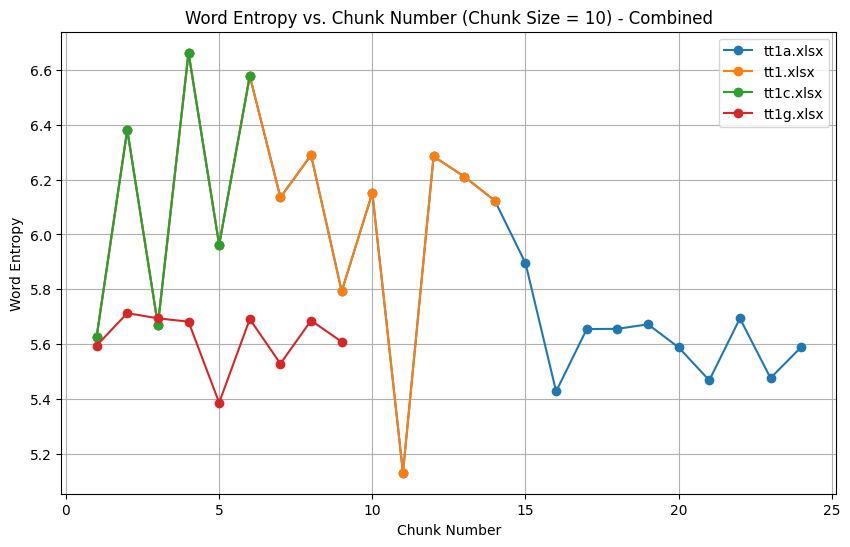

In [ ]:
# prompt: draw a plot for the previous calcualtions


def plot_entropy_vs_chunks_combined(file_paths, column_name, chunk_size=10):
    """Plots entropy vs. chunk number for multiple files in a combined plot."""
    plt.figure(figsize=(10, 6))  # Adjust figure size
    for file_path in file_paths:
        entropies = calculate_entropies_by_chunk(file_path, column_name, chunk_size)
        if entropies:
            chunk_numbers = range(1, len(entropies) + 1)
            plt.plot(chunk_numbers, entropies, marker='o', label=file_path)

    plt.xlabel("Chunk Number")
    plt.ylabel("Word Entropy")
    plt.title(f"Word Entropy vs. Chunk Number (Chunk Size = {chunk_size}) - Combined")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage for the combined plot
file_paths = ['tt1a.xlsx', 'tt1.xlsx', 'tt1c.xlsx', 'tt1g.xlsx']
column_name = 'Comment'
plot_entropy_vs_chunks_combined(file_paths, column_name)


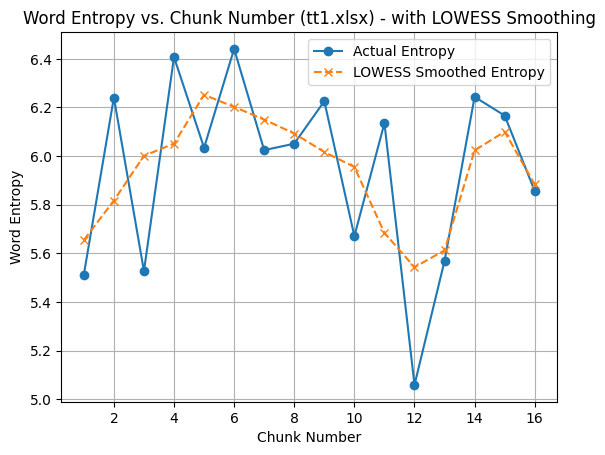

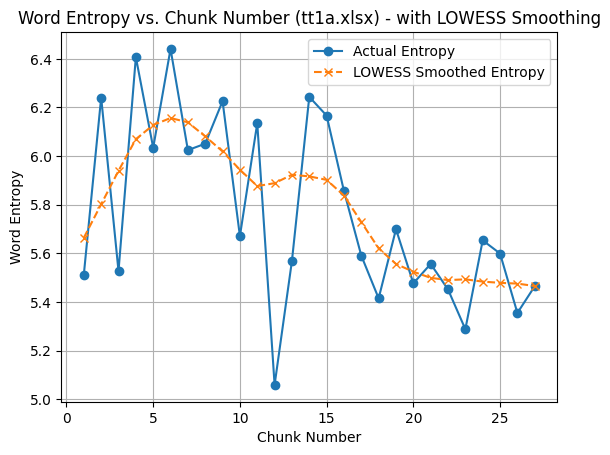

In [ ]:
# prompt: У меня есть массив текстов (комментариев). Нужно:
# Разбить весь массив на две части: первую половину и вторую половину.
# Для первой половины:
# Посчитать энтропию каждого комментария.
# Построить модель, которая по порядку комментариев будет предсказывать значение энтропии (нелинейную зависимость).
# Использовать простую модель регрессии для предсказания нелинейного тренда:
# Либо локальную регрессию LOWESS,
# Либо нейросеть типа MLP (на твой выбор).
# Построить график:
# Где по оси X — индекс комментария,
# По оси Y — реальная энтропия и предсказанная моделью энтропия (две линии на одном графике).
# Вторую половину массива пока не использовать, только первую.

from statsmodels.nonparametric.smoothers_lowess import lowess


def plot_entropy_with_lowess(file_path, column_name, chunk_size=9):
    """
    Calculates and plots entropy with LOWESS smoothing.
    """
    entropies = calculate_entropies_by_chunk(file_path, column_name, chunk_size)
    if entropies:
        chunk_numbers = range(1, len(entropies) + 1)

        # Apply LOWESS smoothing
        smoothed_entropies = lowess(entropies, chunk_numbers, frac=0.3) # Adjust frac as needed

        plt.plot(chunk_numbers, entropies, marker='o', linestyle='-', label='Actual Entropy')
        plt.plot(smoothed_entropies[:, 0], smoothed_entropies[:, 1], marker='x', linestyle='--', label='LOWESS Smoothed Entropy')

        plt.xlabel("Chunk Number")
        plt.ylabel("Word Entropy")
        plt.title(f"Word Entropy vs. Chunk Number ({file_path}) - with LOWESS Smoothing")
        plt.legend()
        plt.grid(True)
        plt.show()


file_paths = ['tt1.xlsx', 'tt1a.xlsx']
column_name = 'Comment'

for file_path in file_paths:  # Process only the first file for demonstration
    plot_entropy_with_lowess(file_path, column_name)


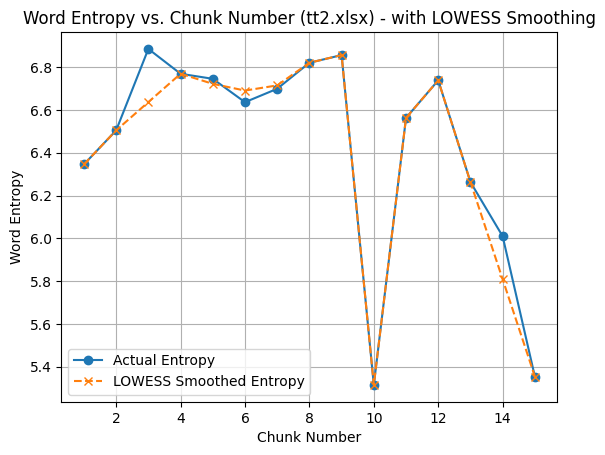

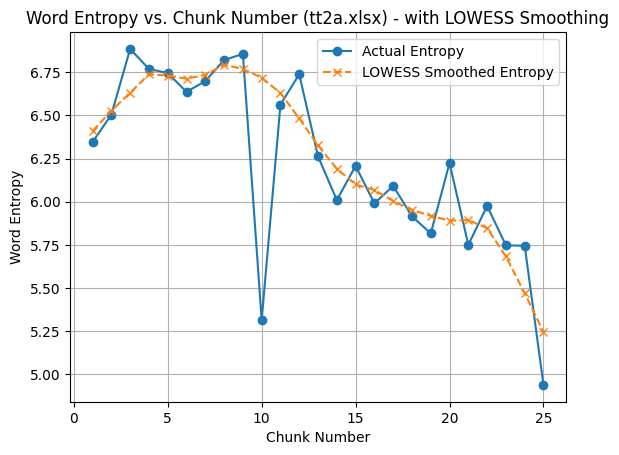

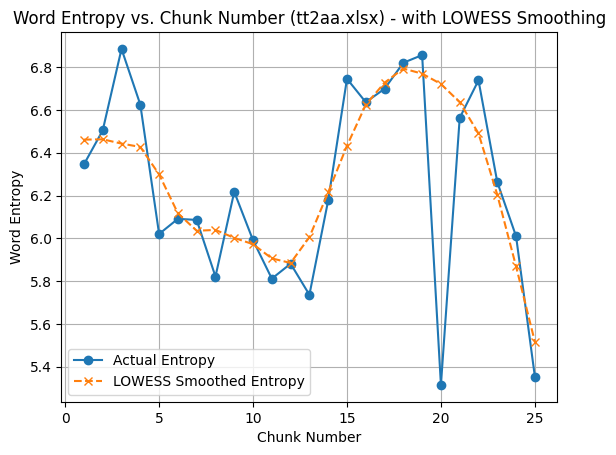

In [ ]:
file_paths = ['tt2.xlsx', 'tt2a.xlsx', 'tt2aa.xlsx']
column_name = 'Comment'

for file_path in file_paths:  # Process only the first file for demonstration
    plot_entropy_with_lowess(file_path, column_name)

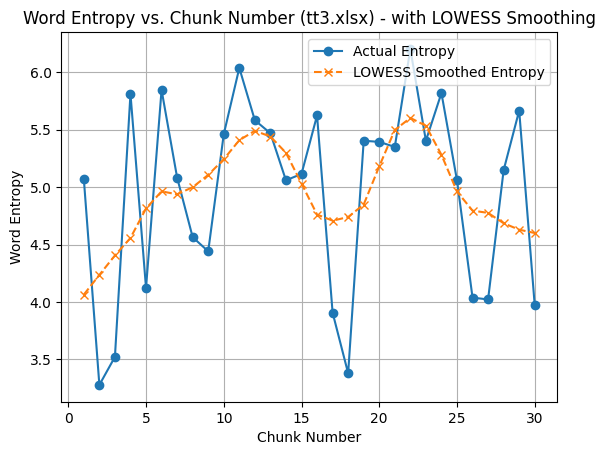

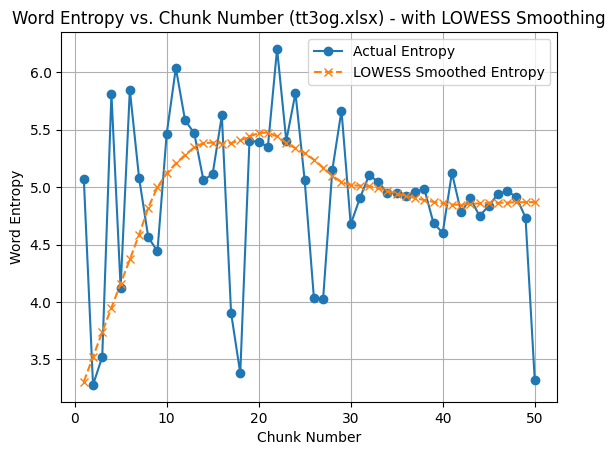

In [ ]:
file_paths = ['tt3.xlsx', 'tt3og.xlsx']
column_name = 'Comment'

for file_path in file_paths:  # Process only the first file for demonstration
    plot_entropy_with_lowess(file_path, column_name)